## Machine Learning Project

#### Personalized Online Learning System using Reinforcement Learning

#### What is Reinforcement Learning
Reinforcement learning (RL) is a machine learning paradigm where an agent learns to make decisions by interacting with an environment to maximize a numerical reward signal.

##### A reinforcement learning system must have four parts:

1. The agent or the machine learning algorithm

2. The environment that the agent works in

3. The policy or basic instructions the agent is following

4. A reward signal for the agent to observe based on their actions. 

Online Learning System for "student performence and behaviour dataset". In this dataset, around 5000 real records from private learing provider. Including like assessments, timing, demographic and engagement features - great for modeling and RL simulation.

We have choose a dataset from kaggle and the link is https://www.kaggle.com/datasets/mahmoudelhemaly/students-grading-dataset?utm_source=chatgpt.com. This dataset we have 5 files 1. Metadata file, 2. Student performance dataset CSV file, 3. Student performance dataset JSON file, 4. Students_Grading_Dataset_Biased CSV file, 5. Students_Grading_Dataset_Biased JSON file

##### Why we have chosen this topic?
This dataset have 23 columns with full of interaction data, such as timestamp, quizscore, and multiple attempts. Student-level granularity: Allows modeling of personalized policies and build state transitions- essential for RL. 

#### Load the dataset and view some insights

In [483]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#Load dataset
students_performance = pd.read_csv(r"C:\Users\MILAN\Desktop\project\Data_science_thesis\coding\dataset_ml\Students Performance Dataset.csv")
students_grading = pd.read_csv(r"C:\Users\MILAN\Desktop\project\Data_science_thesis\coding\dataset_ml\Students_Grading_Dataset_Biased.csv")

In [484]:
#First 5 rows in student performance dataset
students_performance.head()

,Student_ID,First_Name,Last_Name,Email,Gender,Age,Department,Attendance (%),Midterm_Score,Final_Score,...,Projects_Score,Total_Score,Grade,Study_Hours_per_Week,Extracurricular_Activities,Internet_Access_at_Home,Parent_Education_Level,Family_Income_Level,Stress_Level (1-10),Sleep_Hours_per_Night
0,S1000,Omar,Williams,student0@university.com,Female,22,Mathematics,97.36,40.61,59.61,...,62.84,59.8865,F,10.3,Yes,No,Master's,Medium,1,5.9
1,S1001,Maria,Brown,student1@university.com,Male,18,Business,97.71,57.27,74.00,...,98.23,81.9170,B,27.1,No,No,High School,Low,4,4.3
2,S1002,Ahmed,Jones,student2@university.com,Male,24,Engineering,99.52,41.84,63.85,...,91.22,67.7170,D,12.4,Yes,No,High School,Low,9,6.1
3,S1003,Omar,Williams,student3@university.com,Female,24,Engineering,90.38,45.65,44.44,...,55.48,51.6535,F,25.5,No,Yes,High School,Low,8,4.9
4,S1004,John,Smith,student4@university.com,Female,23,CS,59.41,53.13,61.77,...,87.43,71.4030,C,13.3,Yes,No,Master's,Medium,6,4.5


In [485]:
#Last 5 rows in student performance dataset
students_performance.tail()

,Student_ID,First_Name,Last_Name,Email,Gender,Age,Department,Attendance (%),Midterm_Score,Final_Score,...,Projects_Score,Total_Score,Grade,Study_Hours_per_Week,Extracurricular_Activities,Internet_Access_at_Home,Parent_Education_Level,Family_Income_Level,Stress_Level (1-10),Sleep_Hours_per_Night
4995,S5995,Ahmed,Jones,student4995@university.com,Male,19,CS,96.09,45.86,45.63,...,51.66,53.5470,F,7.8,No,No,Master's,Medium,10,4.5
4996,S5996,Emma,Brown,student4996@university.com,Male,19,Mathematics,96.30,78.67,47.42,...,52.33,59.0240,F,24.2,No,Yes,NaN,Medium,4,7.2
4997,S5997,John,Brown,student4997@university.com,Female,24,CS,89.94,50.84,65.83,...,97.89,74.7560,C,7.6,No,Yes,NaN,High,5,6.6
4998,S5998,Sara,Davis,student4998@university.com,Male,23,Engineering,99.09,55.44,57.45,...,84.74,68.6585,D,14.5,Yes,No,PhD,Medium,10,5.9
4999,S5999,Maria,Brown,student4999@university.com,Female,21,Mathematics,90.33,93.29,88.42,...,66.23,78.7485,C,29.9,Yes,Yes,PhD,High,2,5.3


In [486]:
#Overall info student performance dataset columns
students_performance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 23 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Student_ID                  5000 non-null   object 
 1   First_Name                  5000 non-null   object 
 2   Last_Name                   5000 non-null   object 
 3   Email                       5000 non-null   object 
 4   Gender                      5000 non-null   object 
 5   Age                         5000 non-null   int64  
 6   Department                  5000 non-null   object 
 7   Attendance (%)              5000 non-null   float64
 8   Midterm_Score               5000 non-null   float64
 9   Final_Score                 5000 non-null   float64
 10  Assignments_Avg             5000 non-null   float64
 11  Quizzes_Avg                 5000 non-null   float64
 12  Participation_Score         5000 non-null   float64
 13  Projects_Score              5000 

In [487]:
students_grading.head()

,Student_ID,First_Name,Last_Name,Email,Gender,Age,Department,Attendance (%),Midterm_Score,Final_Score,...,Projects_Score,Total_Score,Grade,Study_Hours_per_Week,Extracurricular_Activities,Internet_Access_at_Home,Parent_Education_Level,Family_Income_Level,Stress_Level (1-10),Sleep_Hours_per_Night
0,S1000,Omar,Williams,student0@university.com,Female,22,Engineering,52.29,55.03,57.82,...,85.90,56.09,F,6.2,No,Yes,High School,Medium,5,4.7
1,S1001,Maria,Brown,student1@university.com,Male,18,Engineering,97.27,97.23,45.80,...,55.65,50.64,A,19.0,No,Yes,NaN,Medium,4,9.0
2,S1002,Ahmed,Jones,student2@university.com,Male,24,Business,57.19,67.05,93.68,...,73.79,70.30,D,20.7,No,Yes,Master's,Low,6,6.2
3,S1003,Omar,Williams,student3@university.com,Female,24,Mathematics,95.15,47.79,80.63,...,92.12,61.63,A,24.8,Yes,Yes,High School,High,3,6.7
4,S1004,John,Smith,student4@university.com,Female,23,CS,54.18,46.59,78.89,...,68.42,66.13,F,15.4,Yes,Yes,High School,High,2,7.1


In [488]:
students_grading.tail()

,Student_ID,First_Name,Last_Name,Email,Gender,Age,Department,Attendance (%),Midterm_Score,Final_Score,...,Projects_Score,Total_Score,Grade,Study_Hours_per_Week,Extracurricular_Activities,Internet_Access_at_Home,Parent_Education_Level,Family_Income_Level,Stress_Level (1-10),Sleep_Hours_per_Night
4995,S5995,Ahmed,Jones,student4995@university.com,Male,19,Business,NaN,82.15,60.33,...,58.42,85.21,D,25.5,No,Yes,High School,Low,10,8.3
4996,S5996,Emma,Brown,student4996@university.com,Male,19,Business,65.11,86.31,49.80,...,60.87,95.96,C,5.0,No,Yes,NaN,Medium,4,4.0
4997,S5997,John,Brown,student4997@university.com,Female,24,CS,87.54,63.55,64.21,...,82.65,54.25,A,24.8,Yes,No,High School,Medium,4,6.3
4998,S5998,Sara,Davis,student4998@university.com,Male,23,CS,92.56,79.79,94.28,...,94.29,55.84,A,16.1,Yes,Yes,Bachelor's,Low,1,8.4
4999,S5999,Maria,Brown,student4999@university.com,Female,21,Engineering,83.92,83.24,53.47,...,69.25,77.86,F,29.2,No,Yes,PhD,Low,2,6.1


In [489]:
students_grading.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 23 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Student_ID                  5000 non-null   object 
 1   First_Name                  5000 non-null   object 
 2   Last_Name                   5000 non-null   object 
 3   Email                       5000 non-null   object 
 4   Gender                      5000 non-null   object 
 5   Age                         5000 non-null   int64  
 6   Department                  5000 non-null   object 
 7   Attendance (%)              4484 non-null   float64
 8   Midterm_Score               5000 non-null   float64
 9   Final_Score                 5000 non-null   float64
 10  Assignments_Avg             4483 non-null   float64
 11  Quizzes_Avg                 5000 non-null   float64
 12  Participation_Score         5000 non-null   float64
 13  Projects_Score              5000 

## Both the above datasets are same, so we chose any one dataset

In [490]:
# Remove Duplicates
cleaned_ds = students_performance.drop_duplicates()

In [491]:
output_file = r"C:\Users\MILAN\Desktop\project\Data_science_thesis\coding\dataset_ml\Students_Performance_Cleaned.csv"
cleaned_ds.to_csv(output_file, index=False)

#### Data Visualization

In [492]:
print(cleaned_ds.columns)

Index(['Student_ID', 'First_Name', 'Last_Name', 'Email', 'Gender', 'Age',
       'Department', 'Attendance (%)', 'Midterm_Score', 'Final_Score',
       'Assignments_Avg', 'Quizzes_Avg', 'Participation_Score',
       'Projects_Score', 'Total_Score', 'Grade', 'Study_Hours_per_Week',
       'Extracurricular_Activities', 'Internet_Access_at_Home',
       'Parent_Education_Level', 'Family_Income_Level', 'Stress_Level (1-10)',
       'Sleep_Hours_per_Night'],
      dtype='object')


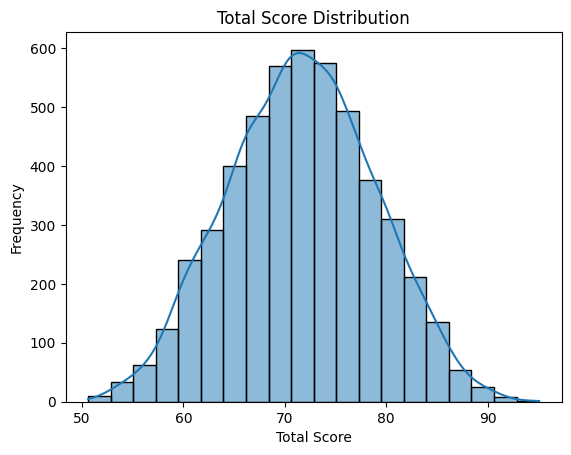

In [493]:
# Total score distribution
sns.histplot(cleaned_ds['Total_Score'], bins=20, kde=True)
plt.title("Total Score Distribution")
plt.xlabel("Total Score")
plt.ylabel("Frequency")
plt.show()

In [494]:
cleaned_ds['Composite_Score'] = (
    cleaned_ds['Midterm_Score'] * 0.3 +
    cleaned_ds['Final_Score'] * 0.4 +
    cleaned_ds['Assignments_Avg'] * 0.1 +
    cleaned_ds['Quizzes_Avg'] * 0.1 +
    cleaned_ds['Projects_Score'] * 0.1
)

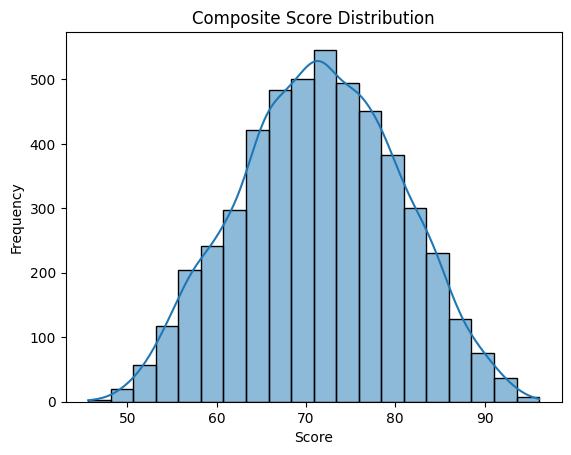

In [495]:
# Composite score Distribution
sns.histplot(cleaned_ds['Composite_Score'], bins=20, kde=True)
plt.title("Composite Score Distribution")
plt.xlabel("Score")
plt.ylabel("Frequency")
plt.show()

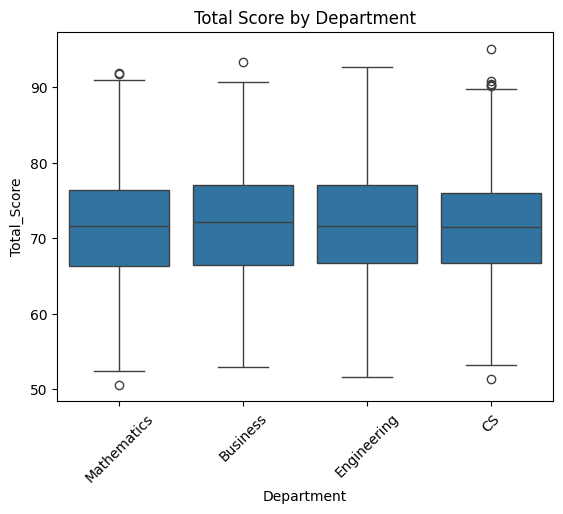

In [496]:
# Boxplot of Total score by department
sns.boxplot(x='Department', y='Total_Score', data=cleaned_ds)
plt.title("Total Score by Department")
plt.xticks(rotation=45)
plt.show()

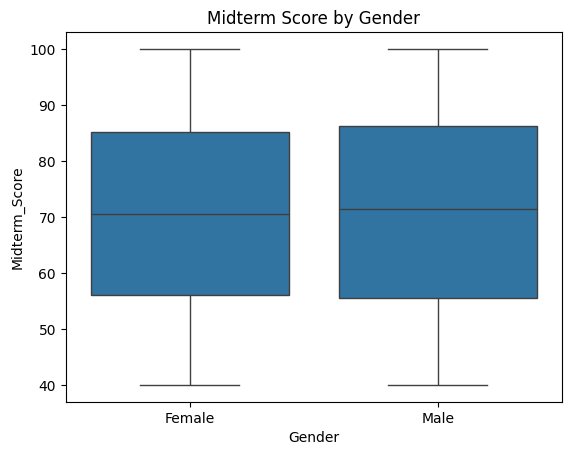

In [497]:
# Boxplot of midterm score by Gender
sns.boxplot(x='Gender', y='Midterm_Score', data=cleaned_ds)
plt.title("Midterm Score by Gender")
plt.show()

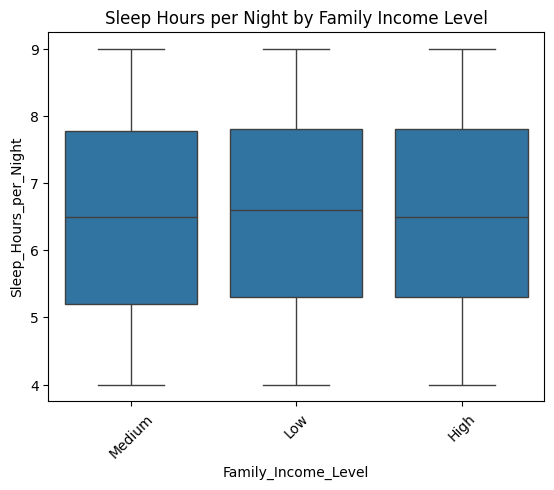

In [498]:
# Boxplot of sleep hours by family level income
sns.boxplot(x='Family_Income_Level', y='Sleep_Hours_per_Night', data=cleaned_ds)
plt.title("Sleep Hours per Night by Family Income Level")
plt.xticks(rotation=45)
plt.show()

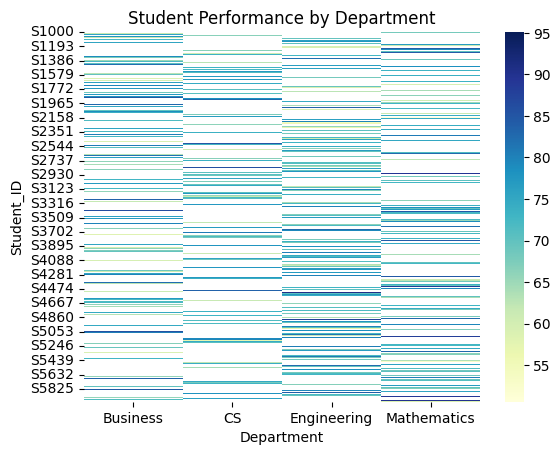

In [499]:
pivot = cleaned_ds.pivot_table(index='Student_ID', columns='Department', values='Total_Score', aggfunc='mean')
sns.heatmap(pivot, cmap="YlGnBu")
plt.title("Student Performance by Department")
plt.show()


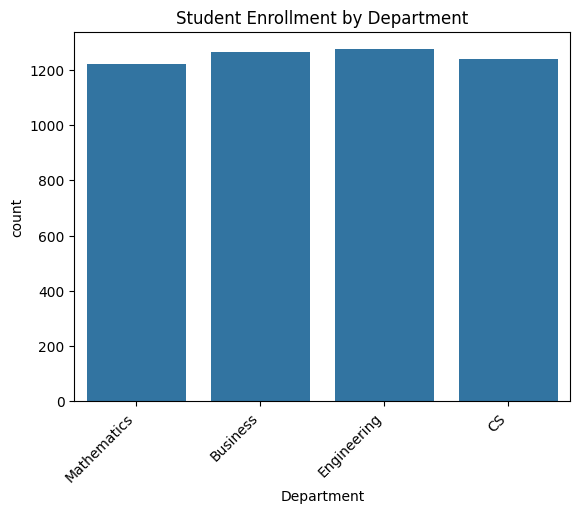

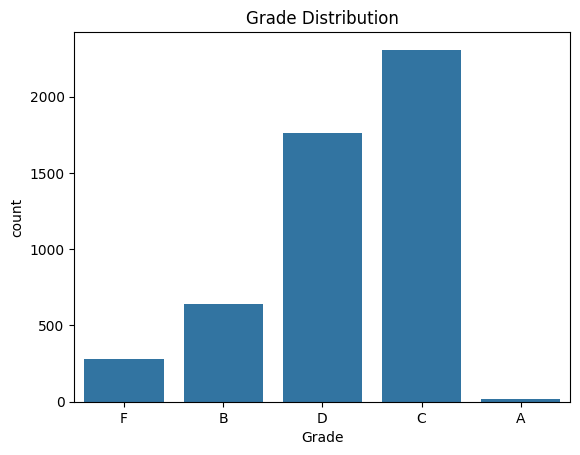

In [500]:
# Countplot for Department (as a replacement for 'module')
sns.countplot(x='Department', data=cleaned_ds)
plt.title("Student Enrollment by Department")
plt.xticks(rotation=45, ha='right')
plt.show()

# Countplot for Attempt Number
sns.countplot(x='Grade', data=cleaned_ds)
plt.title("Grade Distribution")
plt.show()

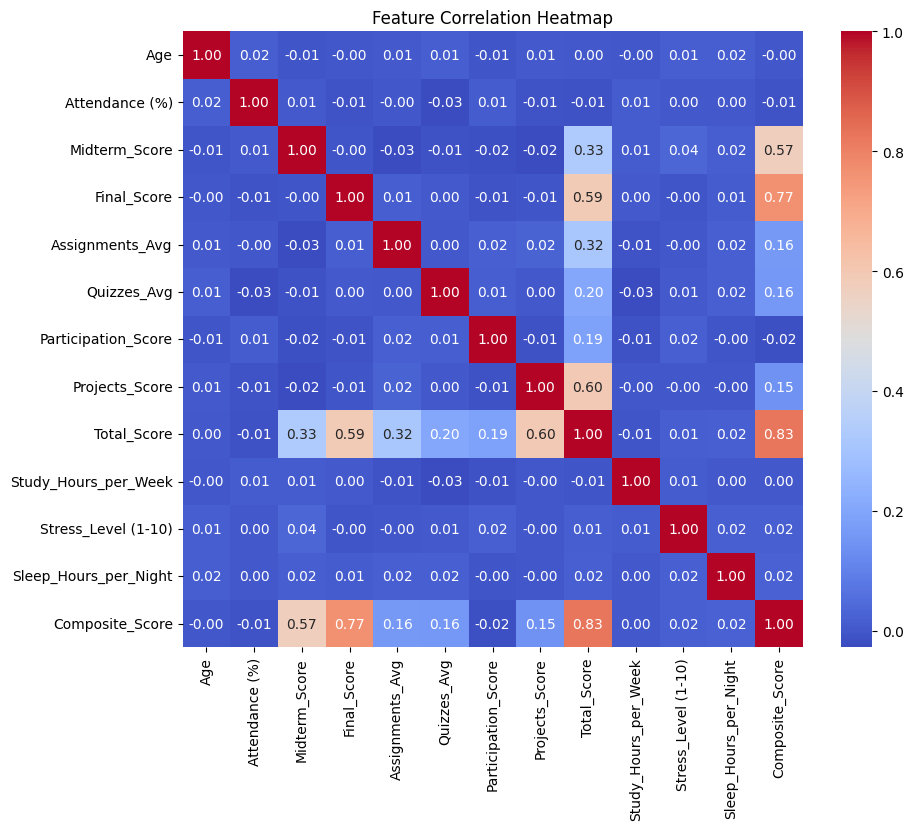

In [501]:
# Heatmap
numeric_cols = cleaned_ds.select_dtypes(include=['number'])
plt.figure(figsize=(10, 8))
sns.heatmap(numeric_cols.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()

### Preprocessing

In [502]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Step 1: Load and prepare data
df = cleaned_ds.copy()
df = df.drop(columns=['Student_ID', 'First_Name', 'Last_Name', 'Email'])


# 2. Define categorical columns
categorical_cols = [
    'Gender', 'Department', 'Extracurricular_Activities',
    'Internet_Access_at_Home', 'Parent_Education_Level', 'Family_Income_Level'
]

target_column = 'Grade'
categorical_columns = df.select_dtypes(include=['object']).columns.drop(target_column)

# Encode categorical features
df_encoded = pd.get_dummies(df, columns=categorical_columns)

# Encode the target
label_encoder = LabelEncoder()
df_encoded[target_column] = label_encoder.fit_transform(df_encoded[target_column])

# Split features and target
X = df_encoded.drop(columns=[target_column])
y = df_encoded[target_column]

# Normalize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

Training Metrics: {'Accuracy': 0.91125, 'Precision': 0.9130352242432875, 'Recall': 0.91125, 'F1 Score': 0.906225745802321}
Test Metrics: {'Accuracy': 0.914, 'Precision': 0.9159931035025755, 'Recall': 0.914, 'F1 Score': 0.907937300188017}


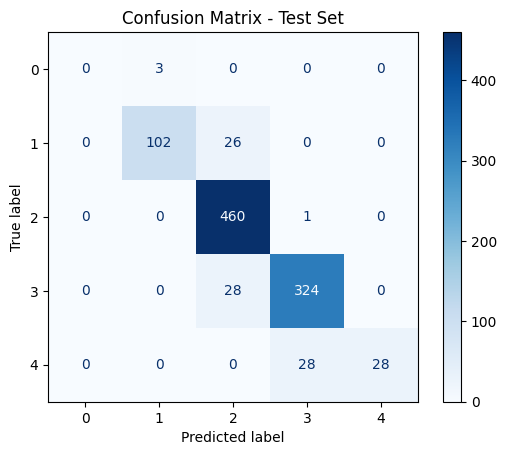

In [503]:
from sklearn.linear_model import LogisticRegression
from sklearn.multiclass import OneVsRestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import numpy as np

# Split data
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42, stratify=y)

# Wrap logistic regression with OneVsRestClassifier
log_reg = OneVsRestClassifier(LogisticRegression(max_iter=1000, random_state=42))
log_reg.fit(X_train, y_train)

# Predict
y_train_pred = log_reg.predict(X_train)
y_test_pred = log_reg.predict(X_test)

# Metrics function
def get_metrics(y_true, y_pred):
    average_type = 'binary' if len(np.unique(y_true)) == 2 else 'weighted'
    return {
        "Accuracy": accuracy_score(y_true, y_pred),
        "Precision": precision_score(y_true, y_pred, average=average_type, zero_division=0),
        "Recall": recall_score(y_true, y_pred, average=average_type, zero_division=0),
        "F1 Score": f1_score(y_true, y_pred, average=average_type, zero_division=0)
    }

# Print metrics
print("Training Metrics:", get_metrics(y_train, y_train_pred))
print("Test Metrics:", get_metrics(y_test, y_test_pred))

# Confusion matrix plot
cm = confusion_matrix(y_test, y_test_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=log_reg.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix - Test Set")
plt.show()

#### Random Forest Classifier


✅ Classification Report:

              precision    recall  f1-score   support

           A       0.00      0.00      0.00         3
           B       0.98      1.00      0.99       128
           C       1.00      1.00      1.00       461
           D       1.00      1.00      1.00       352
           F       1.00      0.98      0.99        56

    accuracy                           1.00      1000
   macro avg       0.79      0.80      0.80      1000
weighted avg       0.99      1.00      0.99      1000



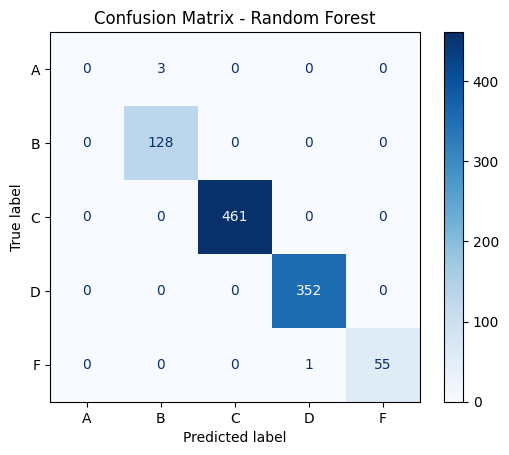

In [504]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Step 1: Load and clean data
df = cleaned_ds.copy()
df = df.drop(columns=['Student_ID', 'First_Name', 'Last_Name', 'Email'])

# Step 2: Encode target labels
label_encoder = LabelEncoder()
df['Grade_Label'] = label_encoder.fit_transform(df['Grade'])

# Step 3: Features and target
X = df.drop(columns=['Grade', 'Grade_Label'])
y = df['Grade_Label']

# Step 4: Define column types
categorical_cols = ['Gender', 'Department', 'Extracurricular_Activities',
                    'Internet_Access_at_Home', 'Parent_Education_Level', 'Family_Income_Level']
numerical_cols = list(set(X.columns) - set(categorical_cols))

# Step 5: Pipelines for preprocessing
numeric_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

categorical_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer([
    ('num', numeric_pipeline, numerical_cols),
    ('cat', categorical_pipeline, categorical_cols)
])

# Step 6: Final model pipeline with Random Forest
rf_model = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(n_estimators=100, class_weight='balanced', random_state=42))
])

# Step 7: Train/test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42)

# Step 8: Fit the model
rf_model.fit(X_train, y_train)

# Step 9: Predict and evaluate
y_pred = rf_model.predict(X_test)

print("\n✅ Classification Report:\n")
print(classification_report(y_test, y_pred, target_names=label_encoder.classes_, zero_division=0))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=label_encoder.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix - Random Forest")
plt.show()

#### Define Environment and DQN Model

In [505]:
import random
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import pandas as pd

In [ ]:
class StudentEnv:
    def __init__(self, X, y):
        self.X = X
        self.y = y
        self.idx = 0

    def reset(self):
        self.idx = 0
        return self.X[self.idx]

    def step(self, action):
        done = False
        reward = 1.0 if action == self.y[self.idx] else -1.0

        self.idx += 1
        if self.idx >= len(self.X):
            done = True
            next_state = self.X[-1]
        else:
            next_state = self.X[self.idx]

        return next_state, reward, done

In [509]:
class DQN(nn.Module):
    def __init__(self, input_dim, output_dim):
        super(DQN, self).__init__()
        self.fc1 = nn.Linear(input_dim, 128)
        self.fc2 = nn.Linear(128, 64)
        self.out = nn.Linear(64, output_dim)

    def forward(self, x):
        if len(x.shape) == 1:
            x = x.unsqueeze(0)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        return self.out(x)

In [510]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

input_dim = X_train.shape[1]
output_dim = len(np.unique(y_train))

model = DQN(input_dim, output_dim).to(device)
optimizer = optim.Adam(model.parameters(), lr=0.001)
criterion = nn.MSELoss()

gamma = 0.99
epsilon = 1.0
epsilon_decay = 0.995
min_epsilon = 0.01
episodes = 50

env = StudentEnv(X_train, y_train)

for ep in range(episodes):
    state = env.reset()
    state = torch.tensor(state, dtype=torch.float32).to(device)

    total_reward = 0
    while True:
        # Epsilon-greedy action
        if random.random() < epsilon:
            action = random.randint(0, output_dim - 1)
        else:
            with torch.no_grad():
                q_vals = model(state)
                action = torch.argmax(q_vals).item()

        # Take step
        next_state, reward, done = env.step(action)
        next_state_tensor = torch.tensor(next_state, dtype=torch.float32).to(device)

        with torch.no_grad():
            max_next_q = torch.max(model(next_state_tensor)).item()
            target = reward + gamma * max_next_q if not done else reward

        # Q-learning update
        q_val = model(state)[action]
        loss = criterion(q_val, torch.tensor(target).float().to(device))

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        state = next_state_tensor
        total_reward += reward

        if done:
            break

    epsilon = max(min_epsilon, epsilon * epsilon_decay)
    print(f"🎯 Episode {ep + 1} | Total Reward: {total_reward} | Epsilon: {epsilon:.3f}")

print("✅ Training complete.")

# -----------------------------
# STEP 5: Evaluate on Test Set
# -----------------------------
correct = 0
model.eval()

for i in range(len(X_test)):
    state = torch.tensor(X_test[i], dtype=torch.float32).to(device)
    with torch.no_grad():
        q_vals = model(state)
        action = torch.argmax(q_vals).item()
        if action == y_test[i]:
            correct += 1

accuracy = correct / len(X_test)
print(f"🧪 Test Accuracy: {accuracy:.2%}")

ValueError: could not convert string to float: 'Female'

In [ ]:
gamma = 0.99
epsilon = 1.0
epsilon_decay = 0.995
min_epsilon = 0.01
episodes = 50

X_train_scaled_df = pd.DataFrame(X_train_scaled)
y_train_encoded_series = pd.Series(y_train_encoded)

env = StudentEnv(X_train_scaled_df, y_train_encoded_series)

In [ ]:
for ep in range(episodes):
    state = env.reset()
    state = torch.tensor(state, dtype=torch.float32).unsqueeze(0).to(device)

    total_reward = 0
    done = False

    while not done:
        if random.random() < epsilon:
            action = random.randint(0, output_dim - 1)
        else:
            with torch.no_grad():
                q_vals = model(state)
                action = torch.argmax(q_vals).item()

        next_state, reward, done = env.step(action)
        next_state_tensor = torch.tensor(next_state, dtype=torch.float32).unsqueeze(0).to(device)

        with torch.no_grad():
            if not done:
                max_next_q = torch.max(model(next_state_tensor)).item()
                target = reward + gamma * max_next_q
            else:
                target = reward

        q_val = model(state)[0, action]
        loss = criterion(q_val, torch.tensor(target).float().to(device))

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        state = next_state_tensor
        total_reward += reward

    epsilon = max(min_epsilon, epsilon * epsilon_decay)
    print(f"🎯 Episode {ep+1} — Total Reward: {total_reward} — Epsilon: {epsilon:.3f}")

print("✅ Training complete.")

RuntimeError: mat1 and mat2 shapes cannot be multiplied (1x24 and 19x128)

#### Proximal Policy Optimization(PPO) Model

In [ ]:
# Environment

class StudentEnvPPO:
    def __init__(self, X, y):
        self.X = X
        self.y = y.reset_index(drop=True)
        self.idx = 0
        self.num_classes = len(np.unique(y))

    def reset(self):
        self.idx = 0
        return self.X[self.idx]

    def step(self, action):
        correct = int(action == self.y.iloc[self.idx])
        reward = 1.0 if correct else 0.0
        self.idx += 1
        done = self.idx >= len(self.X)
        next_state = self.X[self.idx] if not done else np.zeros_like(self.X[0])
        return next_state, reward, done

In [ ]:
# Actor-Critic Network

import torch.nn.functional as F

class ActorCritic(nn.Module):
    def __init__(self, state_dim, action_dim):
        super(ActorCritic, self).__init__()
        self.fc = nn.Linear(state_dim, 128)
        self.actor = nn.Linear(128, action_dim)
        self.critic = nn.Linear(128, 1)

    def forward(self, x):
        x = F.relu(self.fc(x))
        logits = self.actor(x)
        value = self.critic(x)
        return logits, value

    def act(self, state):
        logits, _ = self.forward(state)
        dist = torch.distributions.Categorical(logits=logits)
        action = dist.sample()
        return action.item(), dist.log_prob(action), dist.entropy()

    def evaluate(self, states, actions):
        logits, values = self.forward(states)
        dist = torch.distributions.Categorical(logits=logits)
        log_probs = dist.log_prob(actions)
        entropy = dist.entropy()
        return log_probs, values.squeeze(), entropy

In [ ]:
# PPO Training Loop

def compute_advantages(rewards, values, gamma=0.99, lam=0.95):
    advantages = []
    gae = 0
    for i in reversed(range(len(rewards))):
        delta = rewards[i] + gamma * (values[i + 1] if i + 1 < len(values) else 0) - values[i]
        gae = delta + gamma * lam * gae
        advantages.insert(0, gae)
    return advantages


In [ ]:
from torch.optim import Adam

def train_ppo(env, state_dim, action_dim, episodes=50, epochs=4, clip_eps=0.2):
    model = ActorCritic(state_dim, action_dim).to(device)
    optimizer = Adam(model.parameters(), lr=0.001)

    for ep in range(episodes):
        state = torch.tensor(env.reset(), dtype=torch.float32).to(device)
        states, actions, rewards, log_probs, values = [], [], [], [], []

        while True:
            action, log_prob, _ = model.act(state)
            next_state, reward, done = env.step(action)

            with torch.no_grad():
                _, value = model.forward(state)

            states.append(state)
            actions.append(torch.tensor(action).to(device))
            log_probs.append(log_prob)
            values.append(value.item())
            rewards.append(reward)

            state = torch.tensor(next_state, dtype=torch.float32).to(device)
            if done:
                break

        values.append(0)  # terminal value
        advantages = compute_advantages(rewards, values)
        returns = [a + v for a, v in zip(advantages, values[:-1])]

        # Convert to tensors
        states = torch.stack(states)
        actions = torch.stack(actions)
        old_log_probs = torch.stack(log_probs).detach()
        returns = torch.tensor(returns, dtype=torch.float32).to(device).detach()
        advantages = torch.tensor(advantages, dtype=torch.float32).to(device).detach()


        for _ in range(epochs):
            new_log_probs, value_preds, entropy = model.evaluate(states, actions)
            ratios = torch.exp(new_log_probs - old_log_probs)

            surr1 = ratios * advantages
            surr2 = torch.clamp(ratios, 1 - clip_eps, 1 + clip_eps) * advantages
            actor_loss = -torch.min(surr1, surr2).mean()
            critic_loss = F.mse_loss(value_preds, returns)
            loss = actor_loss + 0.5 * critic_loss - 0.01 * entropy.mean()

            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

        print(f"Episode {ep + 1}: Total Reward = {sum(rewards)}")
    return model


In [ ]:
# Train PPO

state_dim = X_train.shape[1]
action_dim = len(np.unique(y_train))
env = StudentEnvPPO(X_train, y_train)
ppo_model = train_ppo(env, state_dim, action_dim)

Episode 1: Total Reward = 783.0
Episode 2: Total Reward = 841.0
Episode 3: Total Reward = 867.0
Episode 4: Total Reward = 979.0
Episode 5: Total Reward = 1065.0
Episode 6: Total Reward = 1124.0
Episode 7: Total Reward = 1193.0
Episode 8: Total Reward = 1290.0
Episode 9: Total Reward = 1360.0
Episode 10: Total Reward = 1432.0
Episode 11: Total Reward = 1464.0
Episode 12: Total Reward = 1593.0
Episode 13: Total Reward = 1677.0
Episode 14: Total Reward = 1717.0
Episode 15: Total Reward = 1742.0
Episode 16: Total Reward = 1834.0
Episode 17: Total Reward = 1904.0
Episode 18: Total Reward = 1884.0
Episode 19: Total Reward = 1986.0
Episode 20: Total Reward = 2030.0
Episode 21: Total Reward = 2085.0
Episode 22: Total Reward = 2126.0
Episode 23: Total Reward = 2226.0
Episode 24: Total Reward = 2244.0
Episode 25: Total Reward = 2332.0
Episode 26: Total Reward = 2370.0
Episode 27: Total Reward = 2441.0
Episode 28: Total Reward = 2524.0
Episode 29: Total Reward = 2596.0
Episode 30: Total Reward = 

#### Multi-Armed Bandit

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# Convert grades
grade_map = {'A': 4, 'B': 3, 'C': 2, 'D': 1, 'F': 0}
df['Grade_Num'] = df['Grade'].map(grade_map)

In [ ]:
# Define 3 strategies (arms)
def simulate_strategy(student, arm):
    # Use synthetic logic to simulate how student might respond
    if arm == 0:  # Extra study hours
        reward = student['Study_Hours_per_Week'] * 0.05
    elif arm == 1:  # Better assignments
        reward = student['Assignments_Avg'] * 0.04
    elif arm == 2:  # Improve quiz performance
        reward = student['Quizzes_Avg'] * 0.05
    else:
        reward = 0
    return min(reward, 4.0)

In [ ]:
# Epsilon-Greedy Bandit Agent
class EpsilonGreedyAgent:
    def __init__(self, n_arms=3, epsilon=0.1):
        self.epsilon = epsilon
        self.n_arms = n_arms
        self.counts = np.zeros(n_arms)
        self.values = np.zeros(n_arms)

    def select_arm(self):
        if np.random.rand() < self.epsilon:
            return np.random.randint(self.n_arms)
        return np.argmax(self.values)

    def update(self, arm, reward):
        self.counts[arm] += 1
        self.values[arm] += (reward - self.values[arm]) / self.counts[arm]

In [ ]:
# Run bandit for all students
agent = EpsilonGreedyAgent(n_arms=3, epsilon=0.1)
rewards = []

for i, student in df.iterrows():
    arm = agent.select_arm()
    reward = simulate_strategy(student, arm)
    agent.update(arm, reward)
    rewards.append(reward)

Average Reward per Arm: [0.86 2.96 3.54]
Number of Times Each Arm Was Chosen: [ 166  168 4666]


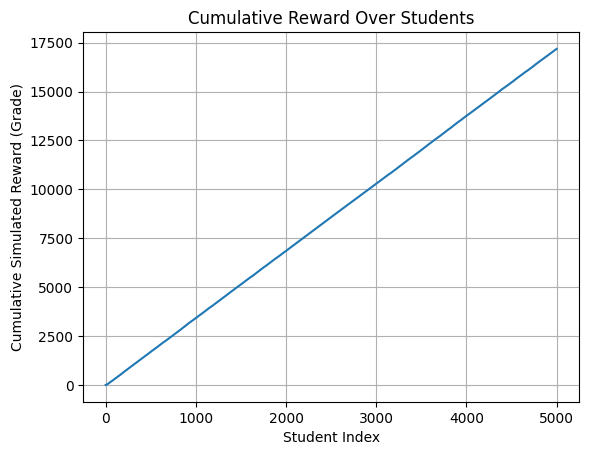

In [ ]:
# Results
print("Average Reward per Arm:", np.round(agent.values, 2))
print("Number of Times Each Arm Was Chosen:", agent.counts.astype(int))

# Plot cumulative rewards
plt.plot(np.cumsum(rewards))
plt.title("Cumulative Reward Over Students")
plt.xlabel("Student Index")
plt.ylabel("Cumulative Simulated Reward (Grade)")
plt.grid(True)
plt.show()